In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [12]:
import pandas as pd
from incels.model import MatingModel
import seaborn as sns

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]

---

In [80]:
mm = MatingModel(10, .5, 20, 20)
for i in range(10000):
    mm.step()

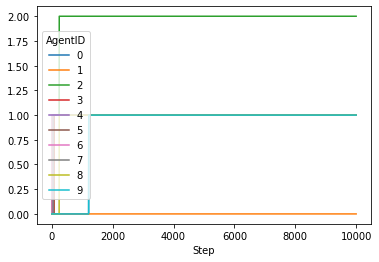

In [81]:
df = (mm.datacollector.get_agent_vars_dataframe())
df["Pairs"].unstack().applymap(len).plot();

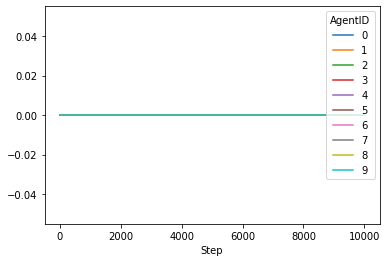

In [82]:
df["Separations"].unstack().applymap(len).plot();

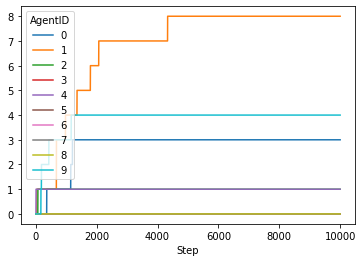

In [83]:
df["Rejections"].unstack().applymap(len).plot();

# Batch run

In [4]:
from mesa.batchrunner import batch_run
import numpy as np

768it [16:08,  1.26s/it]


In [30]:
model_params_s = {
    "height": 20,
    "width": 10,
    "it_M": 0.3,
    "it_F": 0.5,
    "num_agents": range(40, 81, 20),
    "balance": 0.5
}

results_s = batch_run(
    MatingModel,
    parameters=model_params_s,
    iterations=20,
    max_steps=1000,
    number_processes=1,
    data_collection_period=1,
    display_progress=True,
)

1200it [1:06:16,  3.31s/it]


In [31]:
len(results_s)

1201200

In [36]:
df_s = pd.DataFrame(results_s)
df_s.head()

,RunId,iteration,Step,height,width,it_M,it_F,num_agents,balance,Incel_M,Incel_F,Incel,Single_M,Single_F,Single,Avg_rej_M,Avg_rej_F,Avg_rej
0,0,-1,0,20,10,0.3,0.5,40,0.5,0.0,0.0,0.0,1.00,1.00,1.00,0.000000,0.0,0.000000
1,0,-1,1,20,10,0.3,0.5,40,0.5,0.0,0.0,0.0,1.00,1.00,1.00,0.050000,0.0,0.025000
2,0,-1,2,20,10,0.3,0.5,40,0.5,0.0,0.0,0.0,0.95,0.95,0.95,0.052632,0.0,0.026316
3,0,-1,3,20,10,0.3,0.5,40,0.5,0.0,0.0,0.0,0.95,0.95,0.95,0.052632,0.0,0.026316
4,0,-1,4,20,10,0.3,0.5,40,0.5,0.0,0.0,0.0,0.95,0.95,0.95,0.052632,0.0,0.026316


In [37]:
df_s.to_csv("single_run_20-iters.csv")

<AxesSubplot:xlabel='Incel_M', ylabel='Incel_F'>

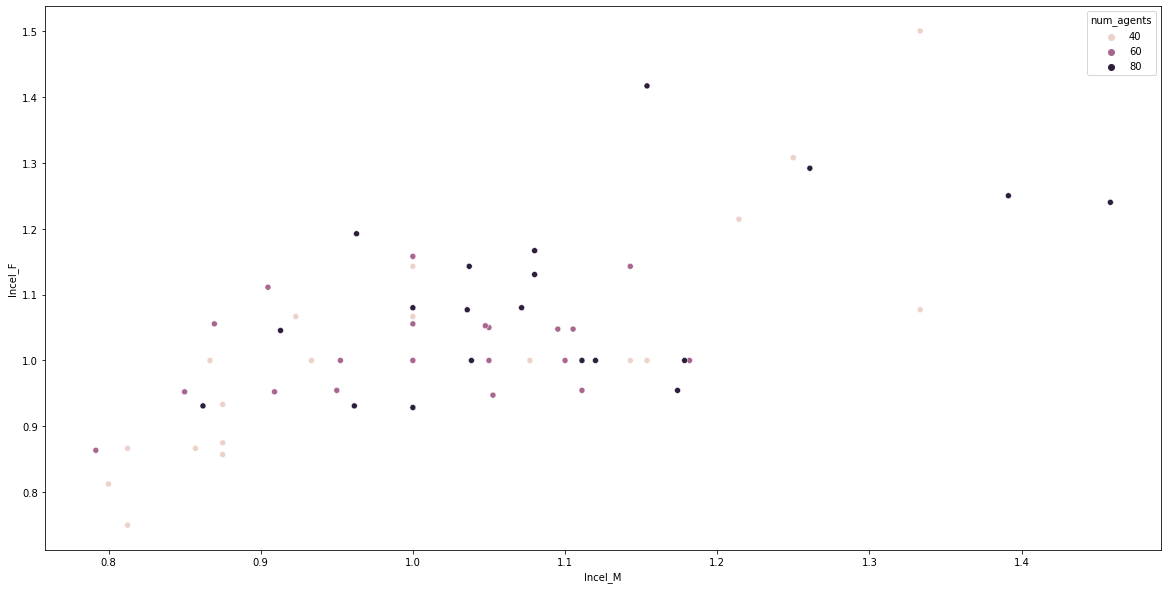

In [42]:
parameters = [*model_params_s.keys(), "iteration"]
plot_df_s = df_s.groupby(parameters).agg({"Incel_M": max, "Incel_F": max}).reset_index().drop("iteration", axis=1)
sns.scatterplot(data=plot_df_s, x="Incel_M", y="Incel_F", hue="num_agents")

<AxesSubplot:xlabel='Single_M', ylabel='Single_F'>

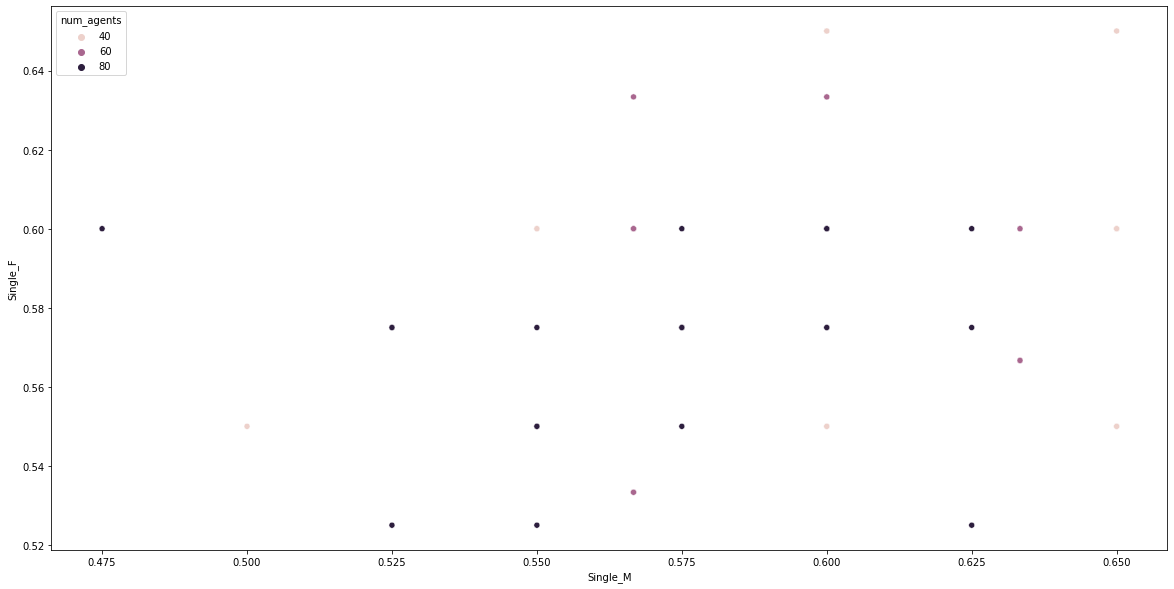

In [43]:
plot_df_s = df_s.groupby(parameters).agg({"Single_M": min, "Single_F": min}).reset_index().drop("iteration", axis=1)
sns.scatterplot(data=plot_df_s, x="Single_M", y="Single_F", hue="num_agents")

<AxesSubplot:xlabel='Avg_rej_M', ylabel='Avg_rej_F'>

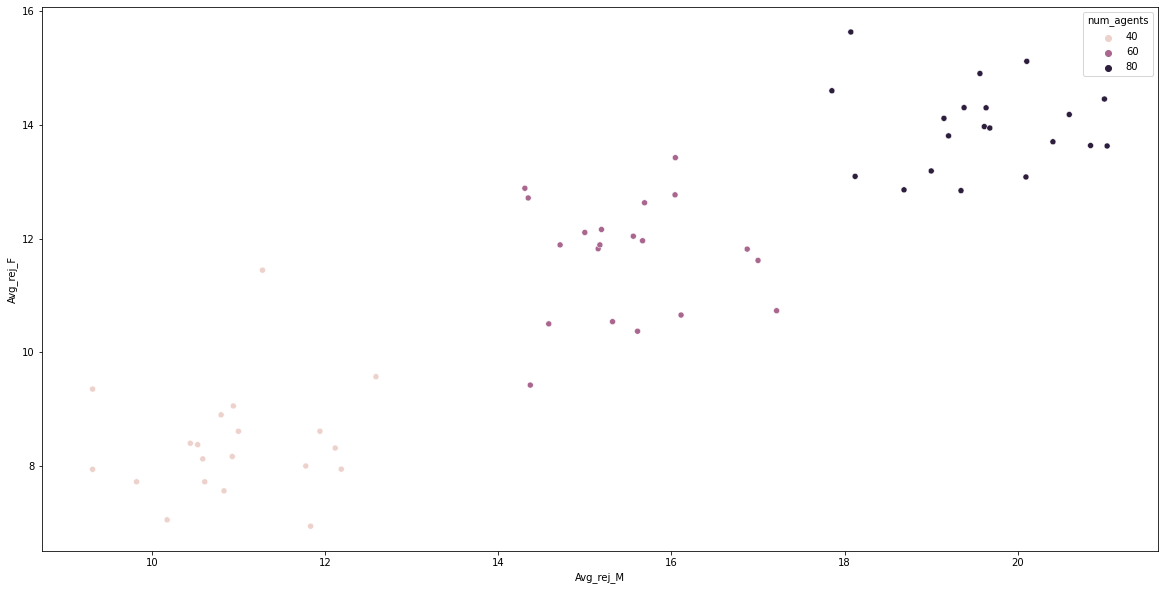

In [44]:
plot_df_s = df_s.groupby(parameters).agg({"Avg_rej_F": max, "Avg_rej_M": max}).reset_index().drop("iteration", axis=1)
sns.scatterplot(data=plot_df_s, x="Avg_rej_M", y="Avg_rej_F", hue="num_agents")

---

In [ ]:
model_params = {
    "height": 20,
    "width": 10,
    "it_M": np.linspace(0.2, 0.8, 4),
    "it_F": np.linspace(0.5,1.3, 4),
    "num_agents": range(40, 80, 20),
    "balance": np.linspace(.2, .8, 6),
}

results = batch_run(
    MatingModel,
    parameters=model_params,
    iterations=2,
    max_steps=500,
    number_processes=1,
    data_collection_period=1,
    display_progress=True,
)

In [7]:
df = pd.DataFrame(results)
df.head()

,RunId,iteration,Step,height,width,it_M,it_F,num_agents,balance,Incel_M,Incel_F,Incel,Single_M,Single_F,Single,Avg_rej_M,Avg_rej_F,Avg_rej
0,0,-1,0,20,10,0.2,0.5,40,0.2,0.0,0.0,0.0,1.0,1.0,1.0,0.500,0.0,0.100
1,0,-1,1,20,10,0.2,0.5,40,0.2,0.0,0.0,0.0,1.0,1.0,1.0,0.500,0.0,0.100
2,0,-1,2,20,10,0.2,0.5,40,0.2,0.0,0.0,0.0,1.0,1.0,1.0,0.625,0.0,0.125
3,0,-1,3,20,10,0.2,0.5,40,0.2,0.0,0.0,0.0,1.0,1.0,1.0,1.000,0.0,0.200
4,0,-1,4,20,10,0.2,0.5,40,0.2,0.0,0.0,0.0,1.0,1.0,1.0,1.000,0.0,0.200


In [89]:
plot_df = df.groupby([*model_params, "iteration"]).agg({"Incel_M": max, "Incel_F": max}).reset_index().drop("iteration", axis=1)

NameError: name 'model_params' is not defined

<AxesSubplot:xlabel='Incel_M', ylabel='Incel_F'>

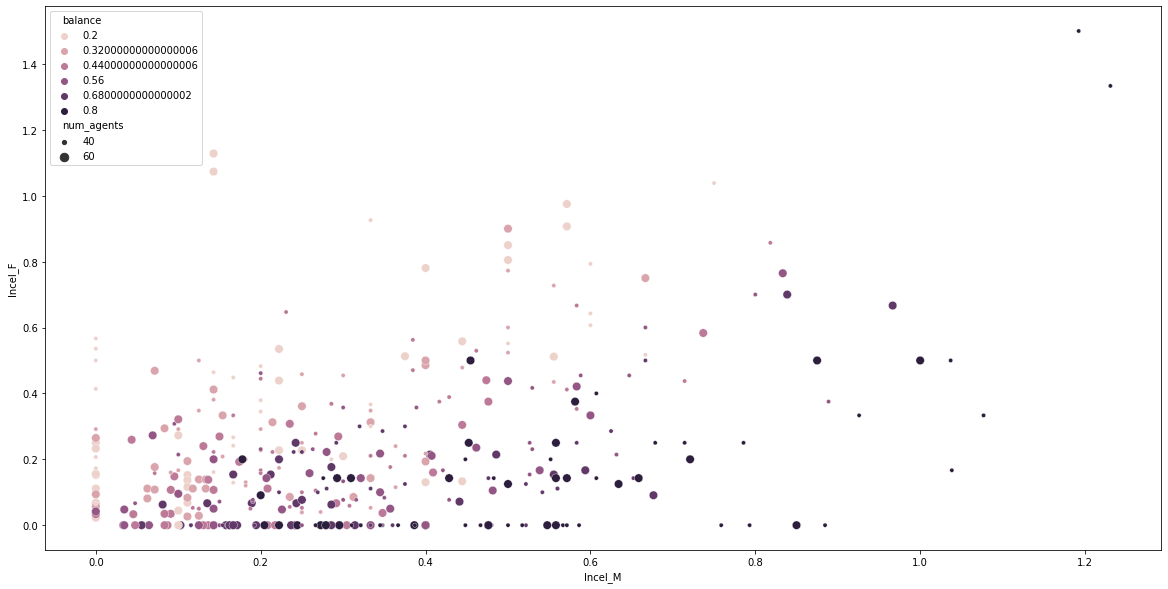

In [29]:
sns.scatterplot(data=plot_df, x="Incel_M", y="Incel_F", size="num_agents", hue="balance")

In [90]:
with open("incels/outputs/single_run_d03_i60_extended.csv", "r") as f:
    df_e = pd.read_csv(f)

<AxesSubplot:xlabel='Single_M', ylabel='Single_F'>

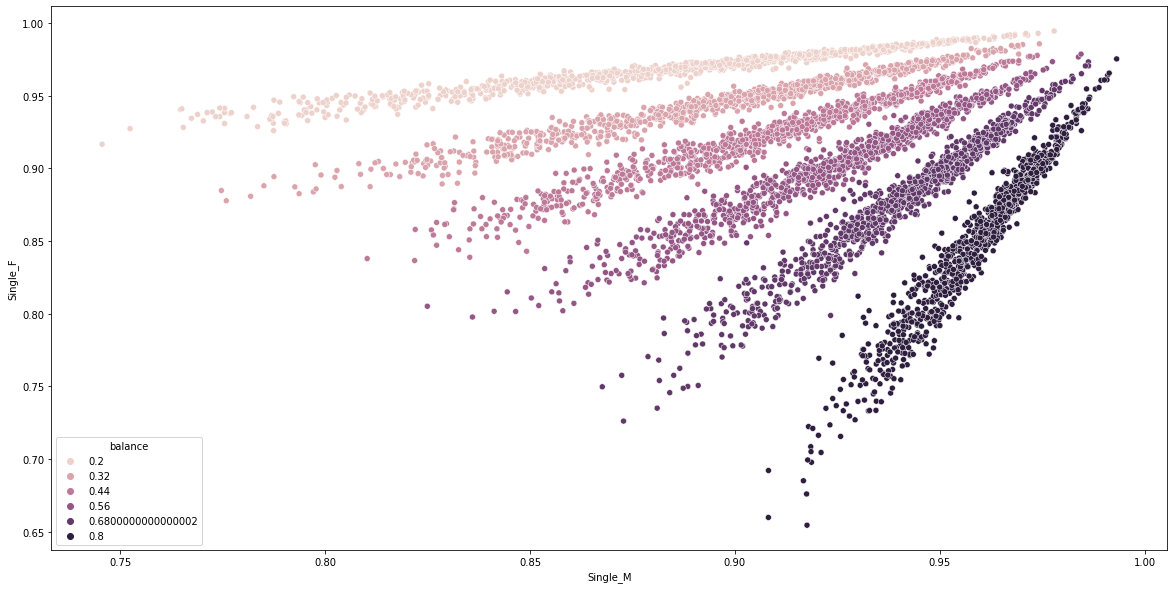

In [115]:
var = "Single"
plot_df = df_e.groupby([*model_params, "iteration"]).agg({f"{var}_M": "mean", f"{var}_F": "mean"}).reset_index().drop("iteration", axis=1)
sns.scatterplot(data=plot_df, x=f"{var}_M", y=f"{var}_F", hue="balance")

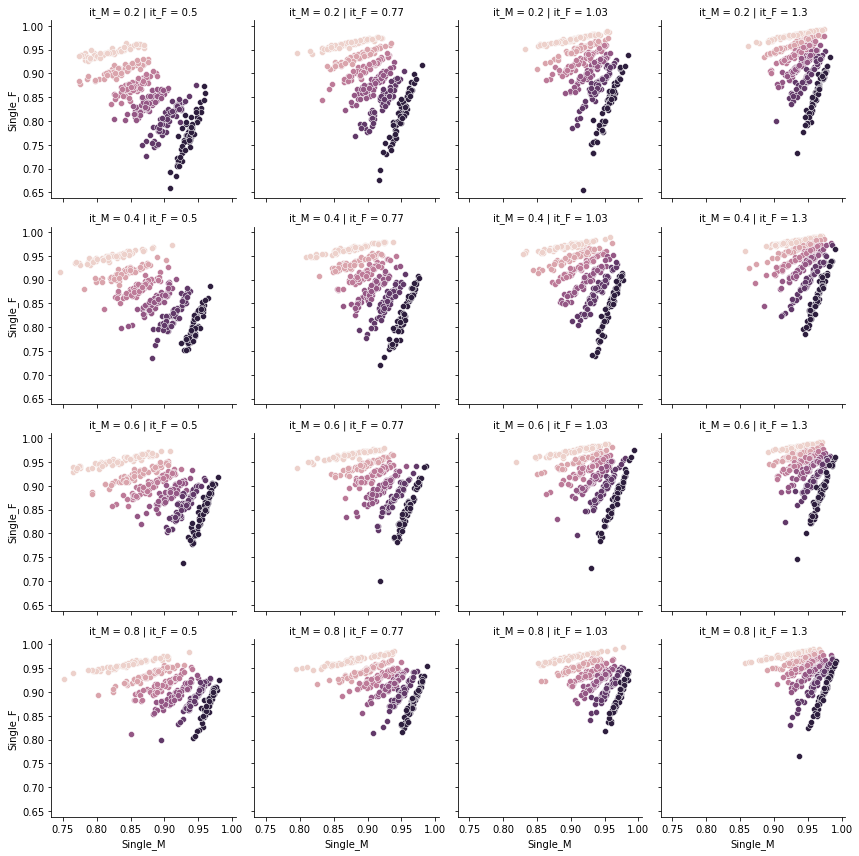

In [117]:
g = sns.FacetGrid(data = plot_df.round({"it_M":2, "it_F":2}), row="it_M", col="it_F", hue="balance", palette=sns.cubehelix_palette(as_cmap=False))
g.map(sns.scatterplot, f"{var}_M", f"{var}_F")

<AxesSubplot:xlabel='Incel_M', ylabel='Incel_F'>

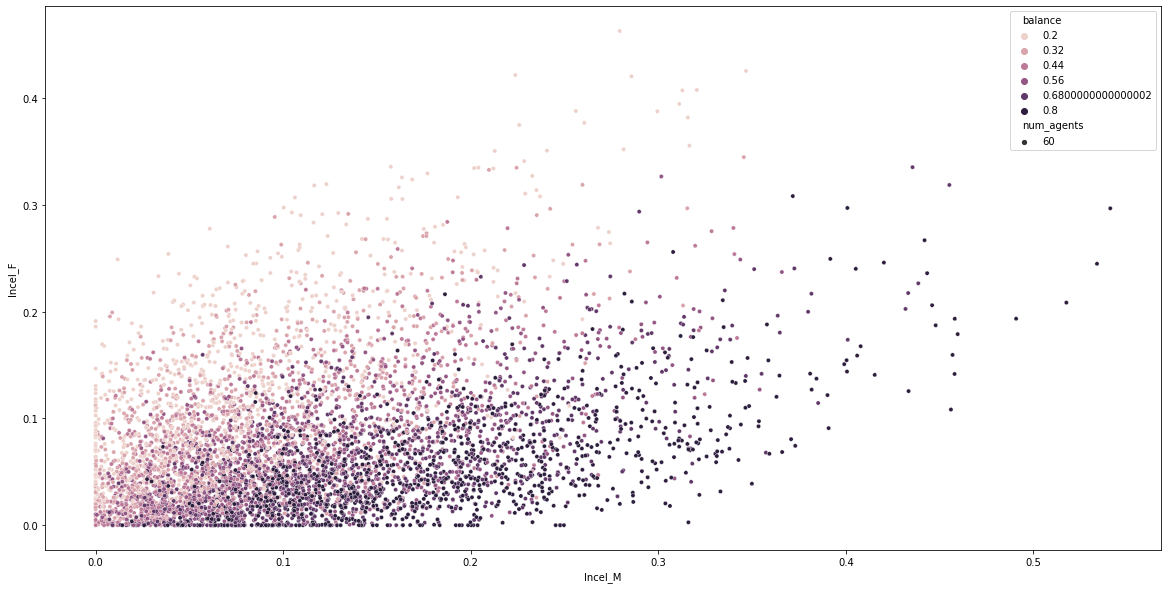

In [99]:
plot_df = df_e.groupby([*model_params, "iteration"]).agg({"Incel_M": 'mean', "Incel_F": 'mean'}).reset_index().drop("iteration", axis=1)
sns.scatterplot(data=plot_df, x="Incel_M", y="Incel_F", size="num_agents", hue="balance")

-------

In [76]:
with open("incels/outputs/single_run_d03_i20.csv", "r") as f:
    df = pd.read_csv(f)

def get_values_for(var):
    return (df
        .set_index(["RunId", "Step"])
        [[f"{var}_{sex}" for sex in MatingModel.sexes]]
        .rename_axis("sex", axis=1)
        .rename(lambda x: x.split("_")[-1], axis=1)
        .stack()
        .rename(var)
        .unstack("RunId")
        )

In [79]:
dt = {var: get_values_for(var) for var in ["Single", "Incel", "Avg_rej"]}

<AxesSubplot:title={'center':'Single_M'}, xlabel='RunId'>

<AxesSubplot:title={'center':'Single_F'}, xlabel='RunId'>

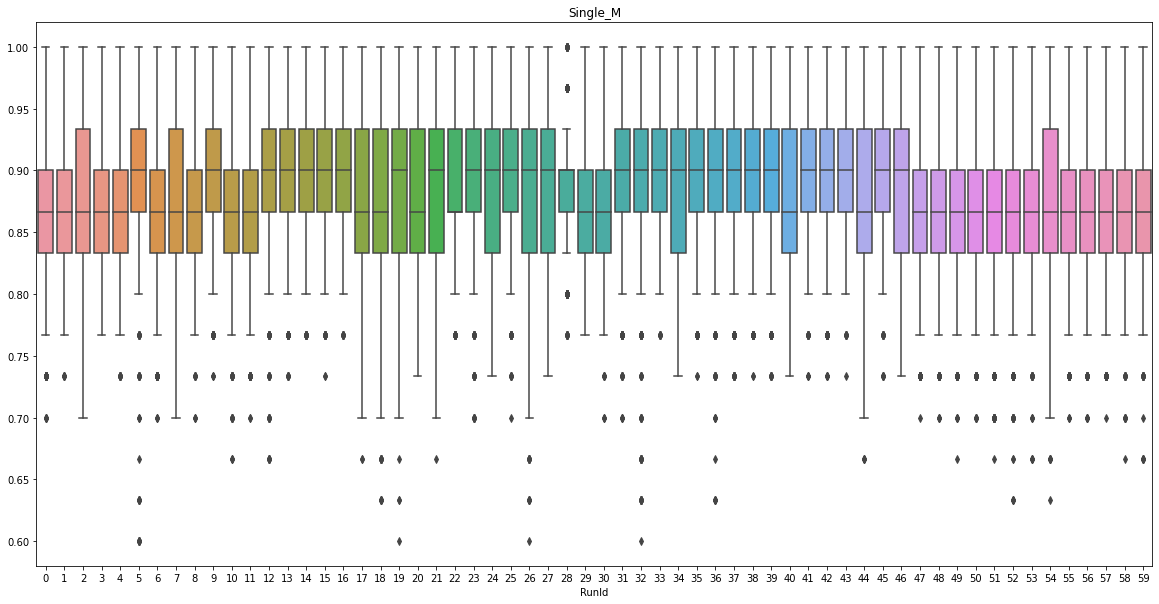

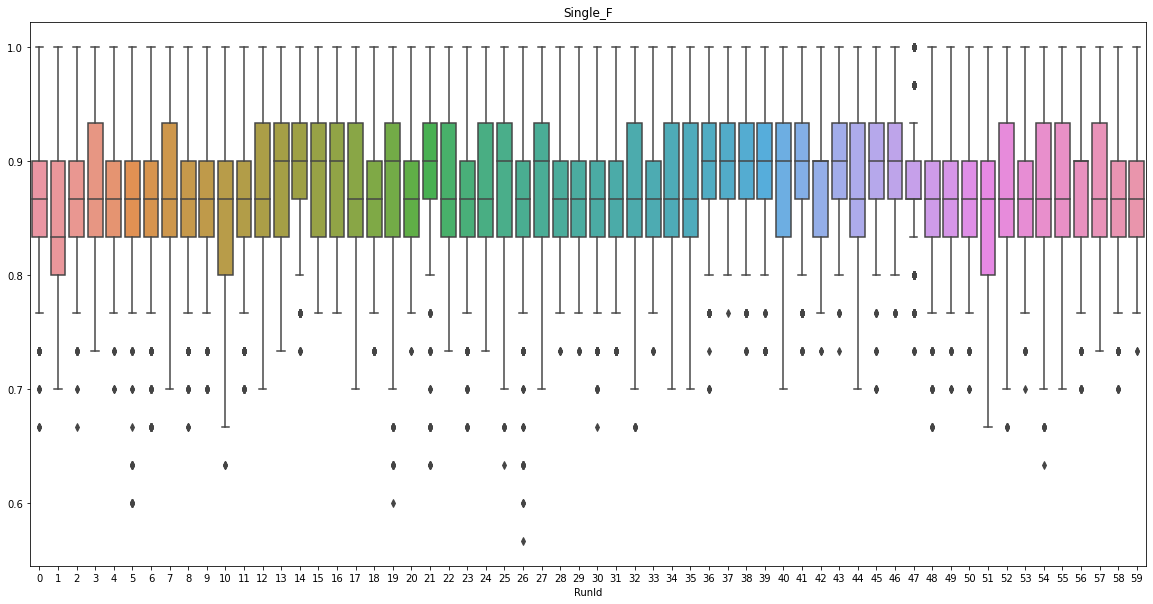

In [82]:
var = "Single"
for sex in MatingModel.sexes:
    fig, ax = plt.subplots()
    ax = sns.boxplot(data=dt[var].loc(axis=0)[:,sex])
    ax.set_title(f"{var}_{sex}")
    display(ax)

<AxesSubplot:title={'center':'Avg_rej_M'}, xlabel='RunId'>

<AxesSubplot:title={'center':'Avg_rej_F'}, xlabel='RunId'>

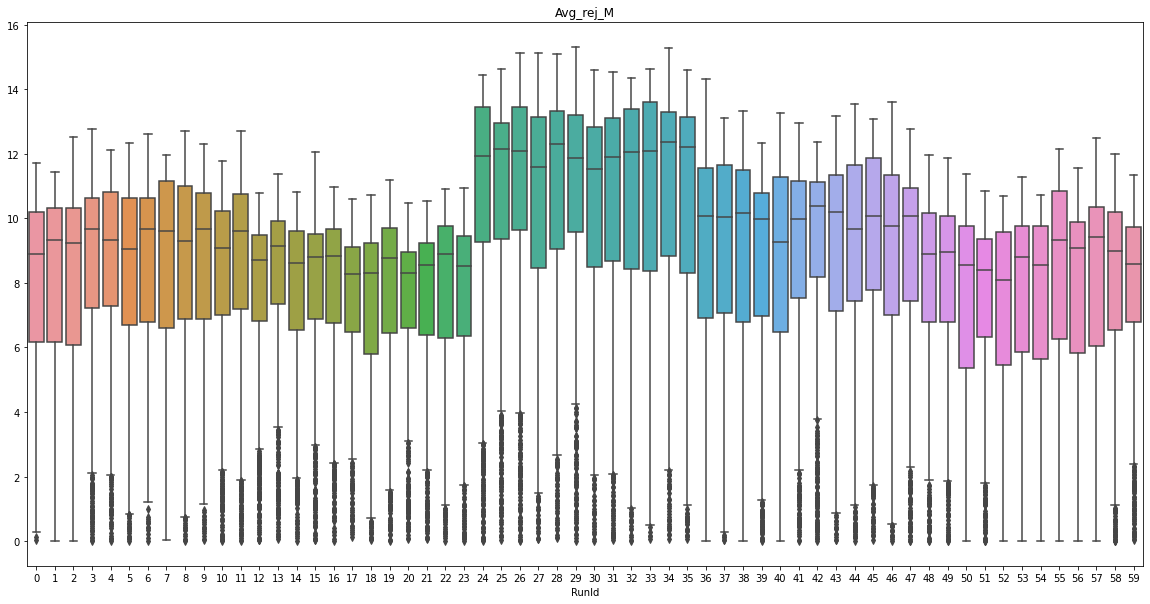

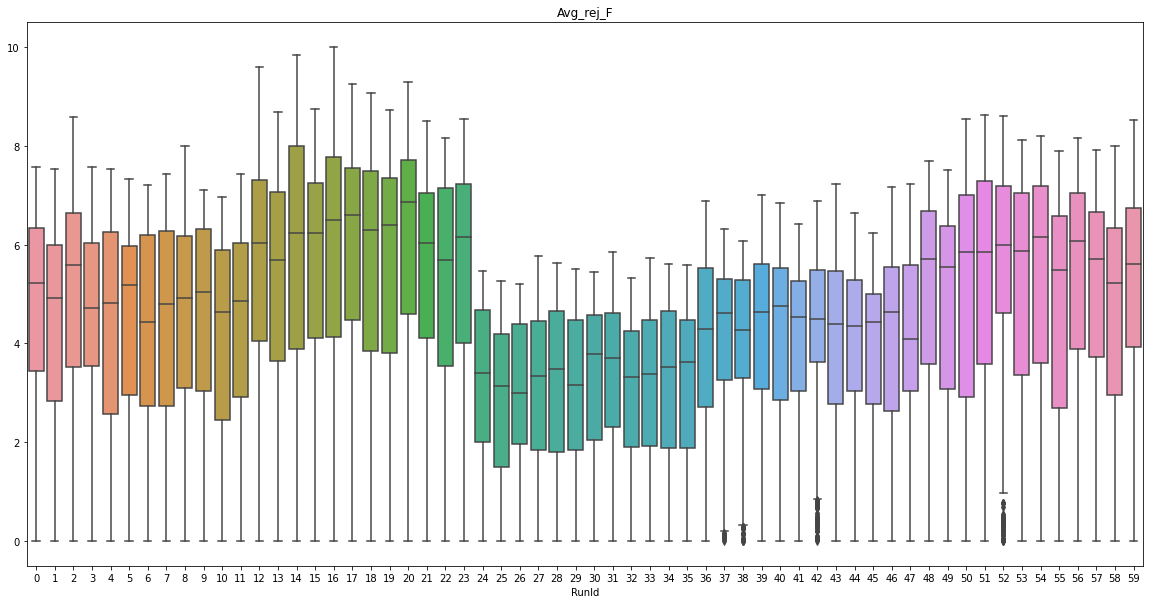

In [83]:
var = "Avg_rej"
for sex in MatingModel.sexes:
    fig, ax = plt.subplots()
    ax = sns.boxplot(data=dt[var].loc(axis=0)[:,sex])
    ax.set_title(f"{var}_{sex}")
    display(ax)

<AxesSubplot:title={'center':'Incel_M'}, xlabel='RunId'>

<AxesSubplot:title={'center':'Incel_F'}, xlabel='RunId'>

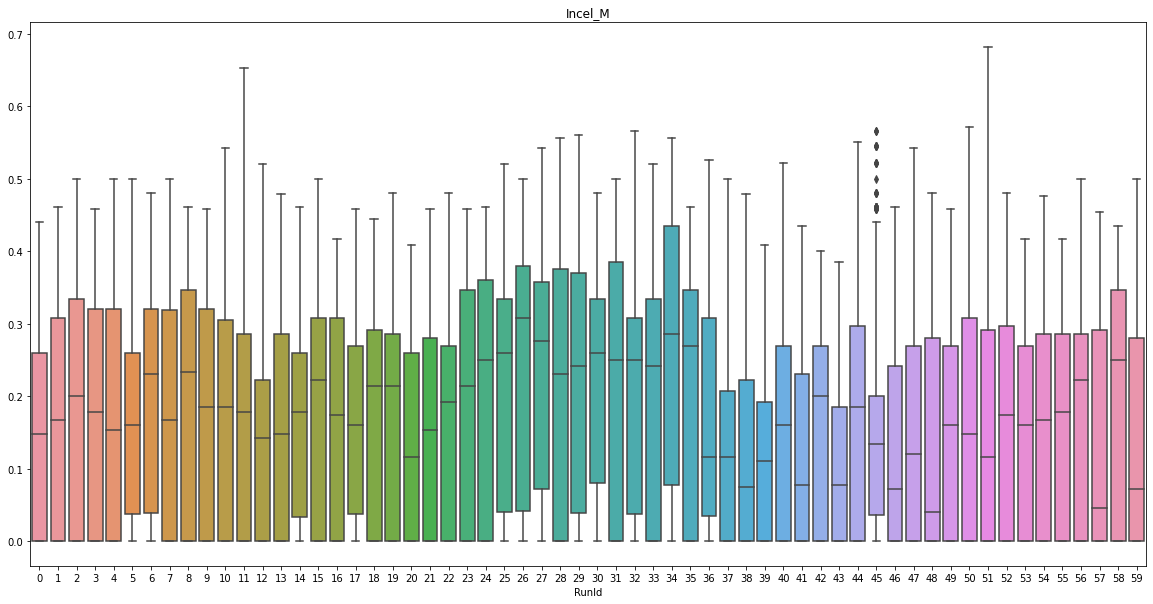

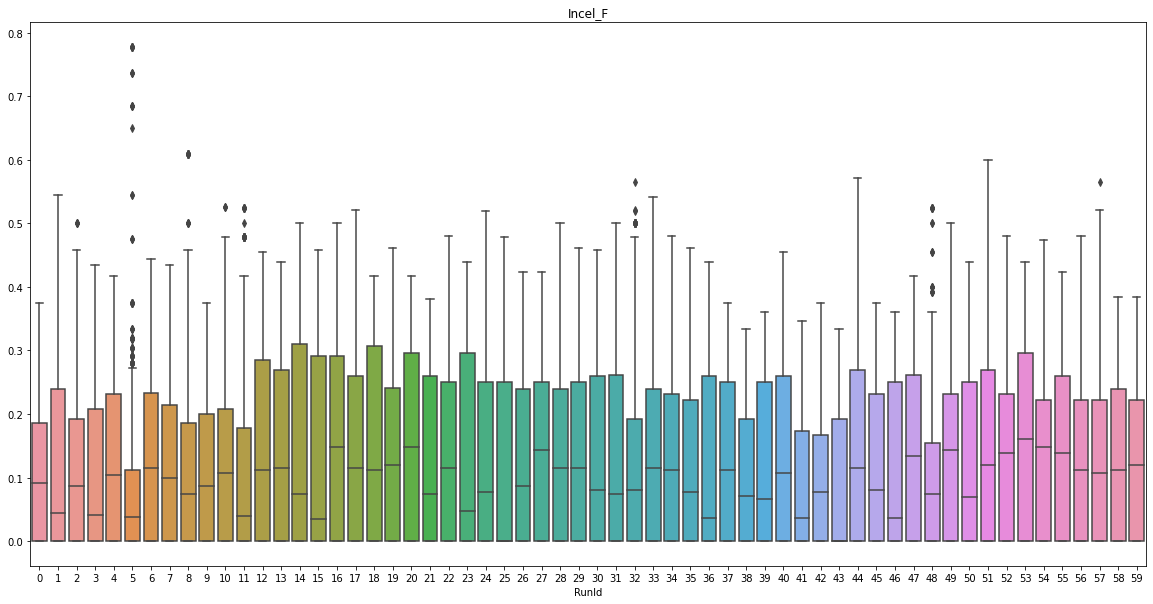

In [81]:
var = "Incel"
for sex in MatingModel.sexes:
    fig, ax = plt.subplots()
    ax = sns.boxplot(data=dt[var].loc(axis=0)[:,sex])
    ax.set_title(f"{var}_{sex}")
    display(ax)

<AxesSubplot:xlabel='Step'>

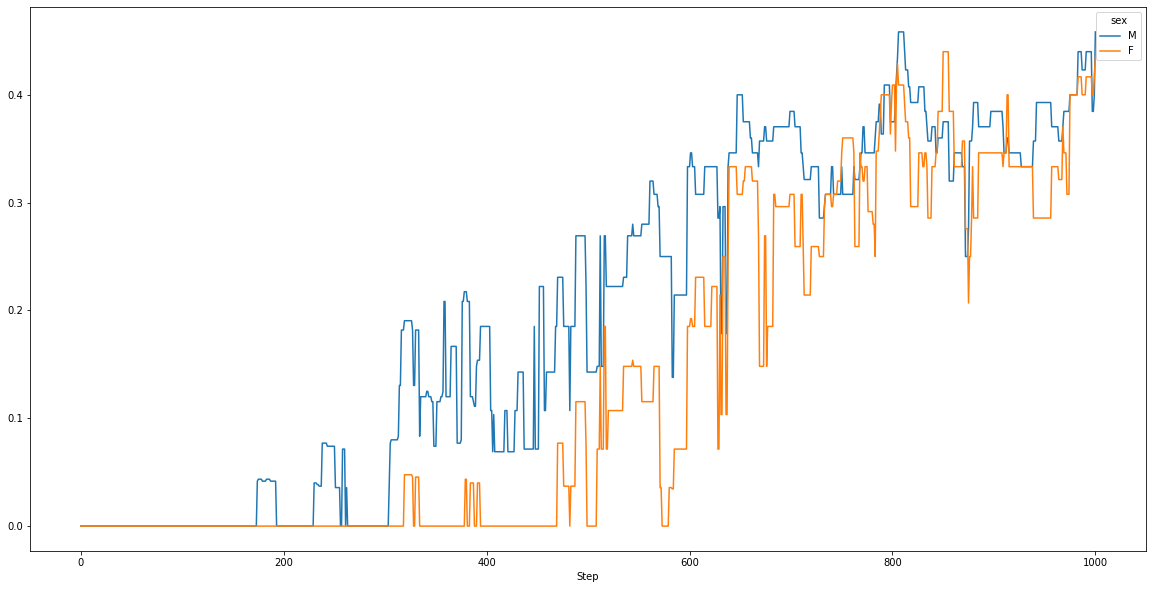

In [87]:
dt["Incel"].loc(axis=1)[23].unstack("sex").plot()